Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=272.883, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=249.057, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=270.884, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=246.243, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=247.150, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=244.281, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=247.067, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=245.216, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=228.656, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=226.931, Time=0.02 sec
 A

c:\Users\letic\Documents\env_leticia\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


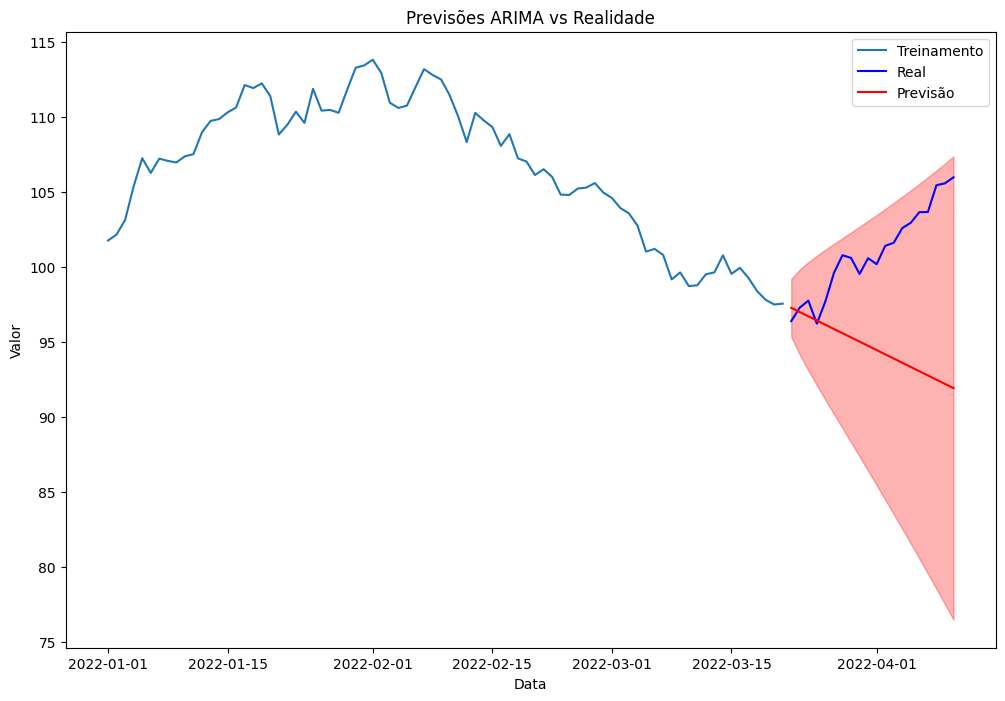

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error

# Criar um DataFrame com dados diários fictícios
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', periods=100)
data = np.random.randn(100).cumsum() + 100  # Gerar uma série temporal acumulada

df = pd.DataFrame(data, index=dates, columns=['value'])

# Dividir os dados em treinamento e teste
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ajustar o modelo auto_arima
model = auto_arima(train, seasonal=False, trace=True, 
                    error_action='ignore', 
                    suppress_warnings=True)

# Resumir o modelo
print(model.summary())

# Fazer previsões
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Adicionar previsões ao DataFrame de teste
test['forecast'] = forecast

# Calcular o erro médio absoluto (MAE)
mae = mean_absolute_error(test['value'], test['forecast'])
print(f'Mean Absolute Error: {mae:.2f}')

# Plotar resultados
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['value'], label='Treinamento')
plt.plot(test.index, test['value'], label='Real', color='blue')
plt.plot(test.index, test['forecast'], label='Previsão', color='red')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
plt.title('Previsões ARIMA vs Realidade')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()
